In [27]:
import os
import numpy as np
import cv2
from glob import glob
from PIL import Image

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
root_dir = '/home/hanshan/Data/DataCV/tmp/synthetic'

In [14]:
fix_dir = os.path.join(root_dir, 'fixation')
saliency_dir = os.path.join(root_dir, 'saliency')
img_dir = os.path.join(root_dir, 'images')

In [10]:
def mkdir(x):
    if not os.path.exists(x):os.makedirs(x) 

In [11]:
mkdir(fix_dir)
mkdir(saliency_dir)

## conver npy to fix png

In [18]:
files = glob(f'{root_dir}/SegmentationObject/*.npy')
len(files)

80

In [56]:
for tmp_file in files:
    tmp_npy = np.load(tmp_file)
    tmp_fix = tmp_npy.astype(np.uint8)
    tmp_fix[tmp_fix==1] = 255
    img = Image.fromarray(tmp_fix)
    img_name = tmp_file.split('/')[-1].split('.')[0]
    img.save(f'{fix_dir}/{img_name}.png')

In [53]:
tmp_fix.dtype

dtype('uint8')

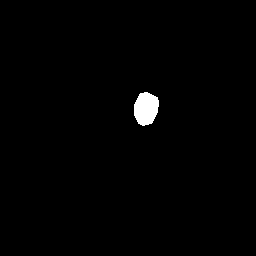

In [55]:
img

In [47]:
# img = cv2.imread('/home/hanshan/Data/DataCV/DataSets/SALICON/fixations_imgs/train/COCO_train2014_000000514209.png',
#                 cv2.IMREAD_GRAYSCALE)

In [54]:
np.unique(img)

array([  0, 255], dtype=uint8)

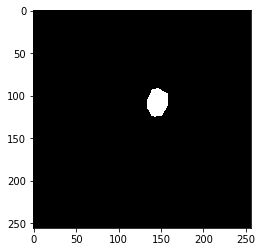

In [42]:
plt.imshow(tmp_npy, cmap='gray')

# conver image blur

In [57]:
files = glob(f'{fix_dir}/*.png')
len(files)

80

In [64]:
for tmp_file in files:
    fix = cv2.imread(tmp_file)
    sal = cv2.GaussianBlur(fix, (7, 7), 0)
    sal = Image.fromarray(sal).convert('L')
    img_name = tmp_file.split('/')[-1].split('.')[0]
    sal.save(f'{saliency_dir}/{img_name}.png')

In [65]:
f'{saliency_dir}/{img_name}.png'

'/home/hanshan/Data/DataCV/tmp/synthetic/saliency/Orientstimdata_-9.png'

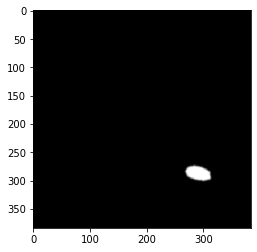

In [59]:
plt.imshow(sal, cmap='gray')

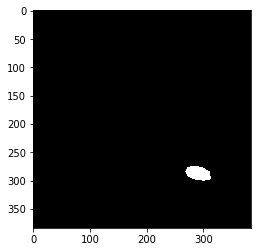

In [60]:
plt.imshow(fix, cmap='gray')